In [20]:
import numpy as np
import gurobipy as gp
import matplotlib.pyplot as plt
import torch
import time
import pickle


import runner
import agent

from graph import Graph
from bssrp_mip import BSSRPMIP
from nn_heuristic import NearestNeighboursHeuristic

from environment import Environment

from evaluation_utils import *

In [2]:
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#devide = torch.device("cpu")

In [3]:
m = gp.Model()

Set parameter Username


2021-11-30 15:43:19,279:INFO:Set parameter Username


Academic license - for non-commercial use only - expires 2022-01-28


2021-11-30 15:43:19,281:INFO:Academic license - for non-commercial use only - expires 2022-01-28


### Generate Graph

In [4]:
seed = 12343

In [5]:
use_penalties = True
no_bikes_leaving = True

In [6]:
num_nodes = 10
num_vehicles = 3
time_limit = 35

k_nn = 5

penalty_cost_demand = 5
penalty_cost_time = 5
bike_load_time = 0

max_load = 10
max_demand = 9

fixed_bikes_leaving = True
starting_fraction = 0.5

speed = 30 

In [7]:
g = Graph(
        num_nodes = num_nodes, 
        k_nn = k_nn, 
        num_vehicles = num_vehicles,
        penalty_cost_demand = penalty_cost_demand,
        penalty_cost_time = penalty_cost_time, 
        starting_fraction=starting_fraction,
        speed = speed,
        bike_load_time=bike_load_time,
        time_limit = time_limit)

#### Model Parameters

In [8]:
#agent_path = 'trained_models/model_2021-11-29_00-00-23.pt'
#agent_path = 'trained_models/model_2021-11-30_08-11-52.pt'
#agent_path = 'trained_models/model_2021-11-30_08-36-08.pt'
agent_path = 'trained_models/model_10_node.pt'

rl_agent = agent.Agent('GATv2', 0, 1, 1000)
rl_agent.load_model(agent_path)

rl_agent.epsilon_ = 0.0
rl_agent.epsilon_min = 0.0
rl_agent.cpu()

rl_agent

In [9]:
mip_params = {
    "use_penalties" : True,
    "fixed_bikes_leaving" : True,
    "silent" : True,
    "solver_time_limit" : 120,
    "solver_gap_limit" : 0.01,
    "visit_all" : True,
}

### Evaluate

In [10]:
n_instances = 100

In [11]:
results = evaluate(g, n_instances, seed, rl_agent, mip_params)

Instance: 10/100
Instance: 20/100
Instance: 30/100
Instance: 40/100
Instance: 50/100
Instance: 60/100
Instance: 70/100
Instance: 80/100
Instance: 90/100
Instance: 100/100


In [12]:
print_results(results)

Reward:
  MIP:  -123.49147334694862 
  NN:   -216.55997037887573 
  RL:   -229.74641444190638 
Solving Time:
  MIP:  1.7303893661499024 
  NN:   0.00013188600540161132 
  RL:   0.08934630870819092 


In [13]:
get_reward_stats(results)

MIP Rewards:
  Reward Type  | Mean               | std               
  --------------------------------------------
  Tour:        | -79.26279762999339   | 14.340332226357283          
  Demands:     | -9.800000190734863 | 9.484724998474121
  Overage:     | -34.428675480043786 | 39.004524212650075 

NN Rewards:
  Reward Type  | Mean               | std               
  --------------------------------------------
  Tour:        | -99.73124433851977   | 23.412807374149292          
  Demands:     | -46.29999923706055 | 30.055112838745117
  Overage:     | -70.52872632732587 | 48.43945929264637 

RL Rewards:
  Reward Type  | Mean               | std               
  --------------------------------------------
  Tour:        | -77.46001784817453   | 12.496490644894742          
  Demands:     | -76.19999694824219 | 49.10763931274414
  Overage:     | -76.08639617184045 | 64.95897460211887 



In [14]:
get_optimality_gaps(results, n_instances, rl_agent)

  Method      | Gap  (%)            
  ----------------------------------
  MIP:        | 0.0 
  NN:         | 77.73197624977328 
  RL:         | 99.45473139172321 


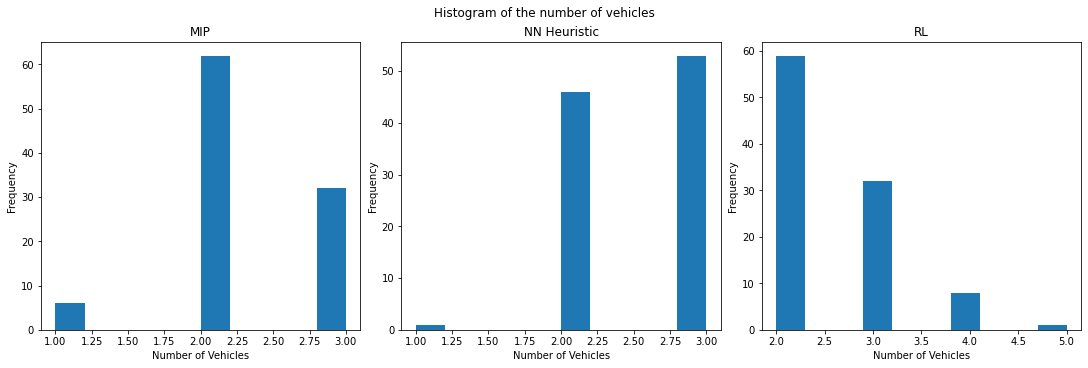

In [15]:
plot_num_routes(results, rl_agent)

### Render

In [16]:
seed = 123

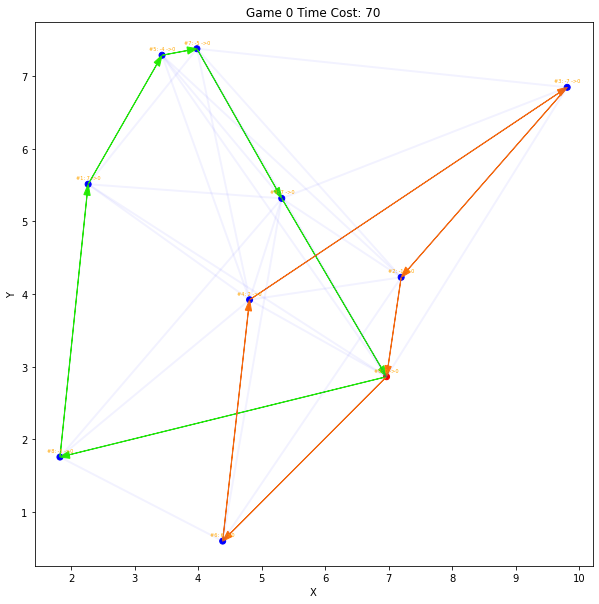

In [17]:
render_mip(g, seed, mip_params)

Reward: -112.10772395133972


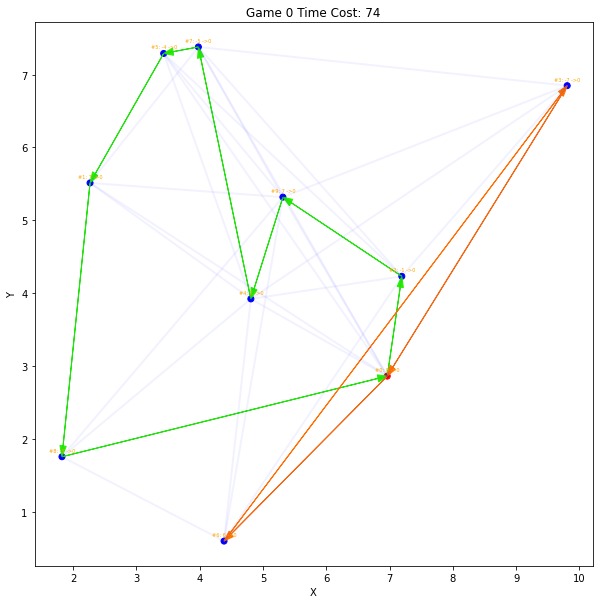

In [18]:
render_nn(g, seed, mip_params)

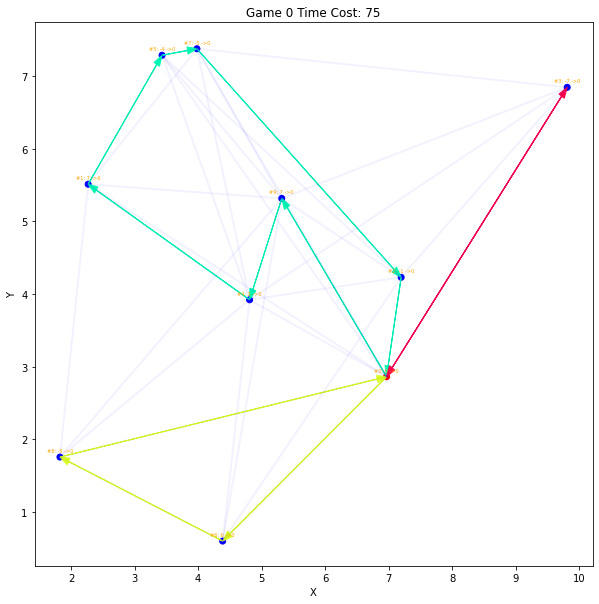

In [19]:
render_rl(g, seed, rl_agent)

### Save results

In [22]:
with open(f'evaluation_results/{num_nodes}_nodes.pickle', 'wb') as p:
    pickle.dump(results, p)